# <h1><center>Demo 6</center></h1>

## Buffer Analysis


In [1]:
# Import Geopandas and matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Read Countries data
countries = gpd.read_file('data/countries.shp')
countries.head()

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,Americas,South America,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [3]:
# How can we find the centroid of all the polygons corresponding to the various countries?

# Find the centroid. .centroid returns the center of the feaure (center point in polygon)
country_centroids = countries.geometry.centroid
country_centroids.head()

C:\Users\yeshw\AppData\Local\Temp\ipykernel_14288\1396804278.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  country_centroids = countries.geometry.centroid


0     POINT (117.27043 -2.22296)
1      POINT (109.69887 3.79239)
2    POINT (-71.36437 -37.74361)
3    POINT (-64.68475 -16.70688)
4     POINT (-74.37806 -9.15439)
dtype: geometry

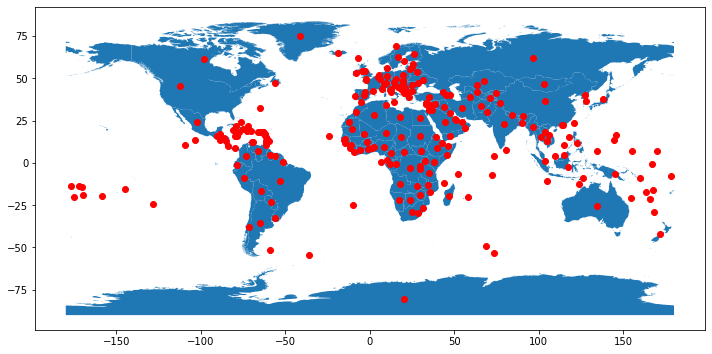

In [4]:
fig, ax = plt.subplots(figsize=(12,10))
countries.plot(ax=ax)
country_centroids.plot(ax=ax, color='red') 

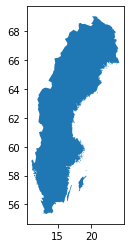

In [7]:
# How can we subset the data for a specific country?
# Subset data to get only the country you want
sweden = countries[countries["NAME"] == "Sweden"]
sweden.plot()


In [8]:
sweden.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
sweden_centroid = sweden.geometry.centroid
sweden_centroid.head()

C:\Users\yeshw\AppData\Local\Temp\ipykernel_14288\3893279967.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sweden_centroid = sweden.geometry.centroid


54    POINT (16.75447 62.77710)
dtype: geometry

In [10]:
sweden_centroid.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

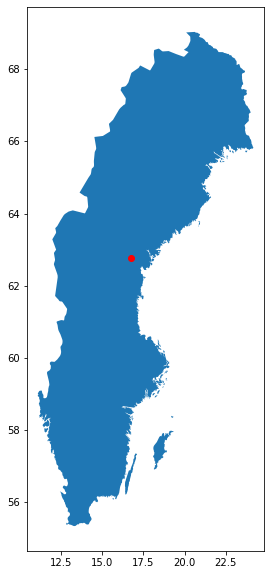

In [11]:
fig, ax = plt.subplots(figsize=(12,10))
sweden.plot(ax=ax)
sweden_centroid.plot(ax=ax, color='red') 

C:\Users\yeshw\AppData\Local\Temp\ipykernel_14288\2437417683.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sweden_centroids_1degree = sweden_centroid.buffer(1)
C:\Users\yeshw\AppData\Local\Temp\ipykernel_14288\2437417683.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sweden_centroids_2degree = sweden_centroid.buffer(2)


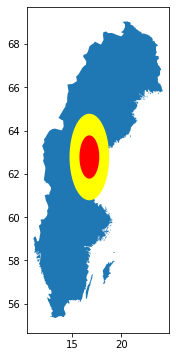

In [12]:
# Let us create a buffer of 1 & 2 degrees and plot them.  
#.buffer() --> Calculates a circle buffer around the point and we can change a Point geometry into a polygon geometry.
sweden_centroids_1degree = sweden_centroid.buffer(1)
sweden_centroids_2degree = sweden_centroid.buffer(2)



fig, ax = plt.subplots(figsize=(8,6))
sweden.plot(ax=ax)
sweden_centroids_2degree.plot(ax=ax, color='yellow')
sweden_centroids_1degree.plot(ax=ax, color='red')
plt.show()



* Project to meter based Coordinate reference System 3006

In [13]:
sweden_centroid_projected = sweden_centroid.to_crs({'init': 'epsg:3006'})
sweden_projected = sweden.to_crs({'init': 'epsg:3006'})
sweden_centroid_projected.crs

C:\Applications\anaconda3\envs\geopy\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Applications\anaconda3\envs\geopy\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Derived Projected CRS: +init=epsg:3006 +type=crs>
Name: SWEREF99 TM
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Sweden - onshore and offshore.
- bounds: (10.03, 54.96, 24.17, 69.07)
Coordinate Operation:
- name: SWEREF99 TM
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

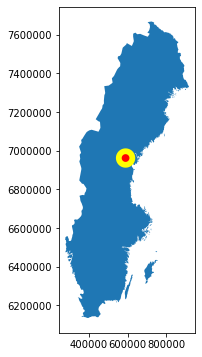

In [14]:
# Let us create a buffer of 20 km & 50 km and plot them
sweden_centroids_20km = sweden_centroid_projected.buffer(20000)
sweden_centroids_50km = sweden_centroid_projected.buffer(50000)


fig, ax = plt.subplots(figsize=(8,6))
sweden_projected.plot(ax=ax)
sweden_centroids_50km.plot(ax=ax, color='yellow')
sweden_centroids_20km.plot(ax=ax, color='red')

plt.show()